In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, initializers

import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize the images to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten the images
train_images = train_images.reshape(-1, 28*28)
test_images = test_images.reshape(-1, 28*28)

11490434/11490434 [==============================] - 0s 0us/step


# Define a custom RBF layer

In [3]:
class RBFLayer(layers.Layer):
    def __init__(self, units, gamma=1.0, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = gamma

    def build(self, input_shape):
        self.centers = self.add_weight(
            name='centers',
            shape=(self.units, input_shape[-1]),
            initializer=initializers.RandomNormal(),
            trainable=True
        )
        self.betas = self.add_weight(
            name='betas',
            shape=(self.units,),
            initializer=initializers.Constant(value=self.gamma),
            trainable=True
        )
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = tf.expand_dims(inputs, axis=1) - self.centers
        l2 = tf.reduce_sum(tf.square(diff), axis=-1)
        return tf.exp(-self.betas * l2)

# Define the Radial Basis Function Network model

In [4]:
model = models.Sequential([
    layers.InputLayer(input_shape=(28*28,)),
    RBFLayer(100, gamma=1.0),
    layers.Dense(10, activation='softmax')
])

# Compile the model

In [5]:
model.compile(optimizer='sgd',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

# Training the model

In [6]:
history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images, test_labels)
)

Epoch 1/10
938/938 [==============================] - 50s 50ms/step - loss: 2.3019 - accuracy: 0.1119 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 2/10
938/938 [==============================] - 30s 32ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/10
938/938 [==============================] - 31s 33ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/10
938/938 [==============================] - 31s 33ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/10
938/938 [==============================] - 35s 37ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/10
938/938 [==============================] - 34s 36ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/10
938/938 [==============================] - 32s 34ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy:

# Visualization of training loss and accuracy

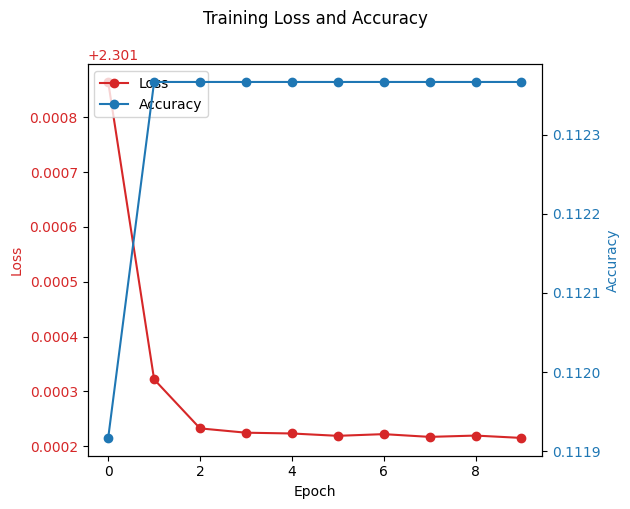

In [8]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(history.epoch, history.history['loss'], marker='o', color=color, label='Loss')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)  # we already handled the x-label with ax1
ax2.plot(history.epoch, history.history['accuracy'], marker='o', color=color, label='Accuracy')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.suptitle('Training Loss and Accuracy', y=1.05)

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

# Evaluation

In [9]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test Accuracy: {test_accuracy:.4f}')

313/313 - 1s - loss: 2.3010 - accuracy: 0.1135 - 1s/epoch - 4ms/step
Test Accuracy: 0.1135


# Visualization of some test images and their predictions

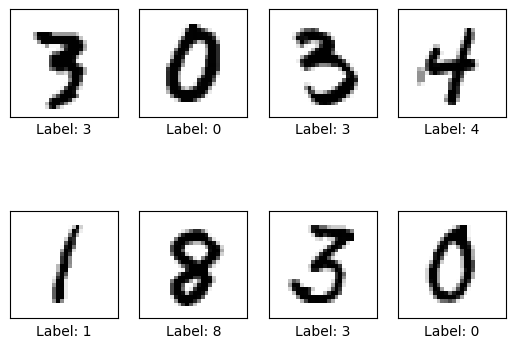

1/1 [==============================] - 1s 508ms/step


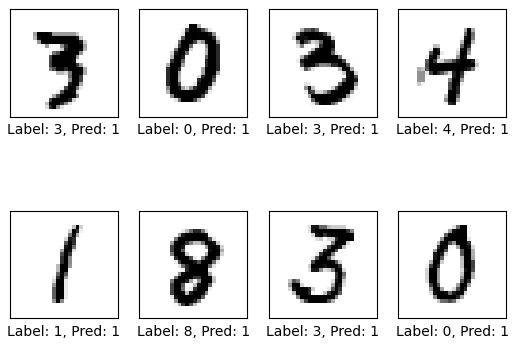

In [10]:
def plot_images(images, labels, predictions=None):
    plt.figure()
    for i in range(8):
        plt.subplot(2, 4, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
        if predictions is None:
            plt.xlabel(f"Label: {labels[i]}")
        else:
            plt.xlabel(f"Label: {labels[i]}, Pred: {predictions[i]}")
    plt.show()

# Get some random test images
indices = np.random.choice(len(test_images), 8)
sample_images = test_images[indices]
sample_labels = test_labels[indices]

# Show images with ground truth labels
plot_images(sample_images, sample_labels)

# Predict labels for the sample images
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Show images with predicted labels
plot_images(sample_images, sample_labels, predicted_labels)